In [84]:
# Importing libraries
import geopandas as gpd
import geoplot as gplt
from shapely.geometry import Polygon, mapping

In [85]:
# Data cleaning methods
# clean_points - input geodataframe, removes any null point geometries
# If not, the pointplot gets angry
def clean_points(gdf):
    gdf = gdf[gdf.geometry.type == 'Point']
    return gdf

# clean_lineString - input geodataframe, converts LineString geometry to polygon
# This is because polyplot does not work on LineStrings!
# Please note that this actually fucking sucks
def clean_lineString(gdf):
    gdf['geometry'] = [Polygon(mapping(x)['coordinates']) for x in gdf.geometry]
    return gdf

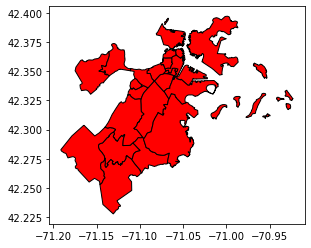

In [95]:
# Global Variables
boston = (-71.2, 42.2, -70.9, 42.4 ) # (minlon, minlat, maxlon, maxlat) of boston
boston_neighborhoods = gpd.read_file('datasets/Boston_Neighborhoods.geojson')
boston_neighborhoods.plot(color= 'red', edgecolor= 'black');
#ax = gplt.polyplot(boston_neighborhoods, extent = boston, edgecolor='white', facecolor='lightgray')

<AxesSubplot:>

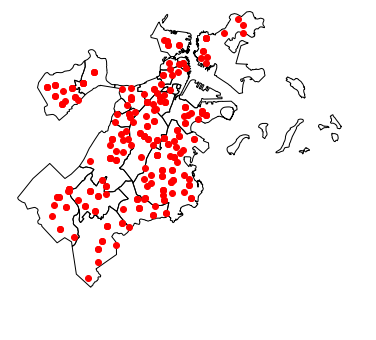

In [101]:
# Add polling locations [Point data type]
ax = gplt.polyplot(boston_neighborhoods, extent = boston)
polling_locations = clean_points(gpd.read_file('datasets/Polling_Locations.geojson'))
polling_locations.plot(ax = ax, color = 'red')

<AxesSubplot:>

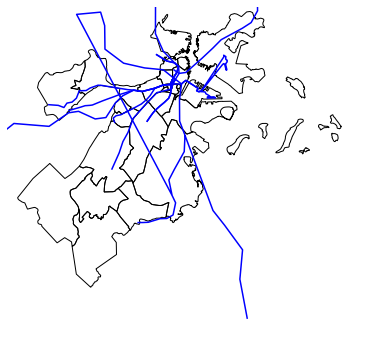

In [99]:
# Adding subway routes [LineString data type]
# Note that geoplot cannot plot linestrings!
# to plot a linestring, you must use the geopandas.plot method
ax = gplt.polyplot(boston_neighborhoods, extent = boston)
mbta_routes = gpd.read_file('datasets/routes.geojson')
mbta_routes.plot(ax = ax, color= 'blue')